In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, LSTM, Embedding

In [2]:
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


NameError: name 'plt' is not defined

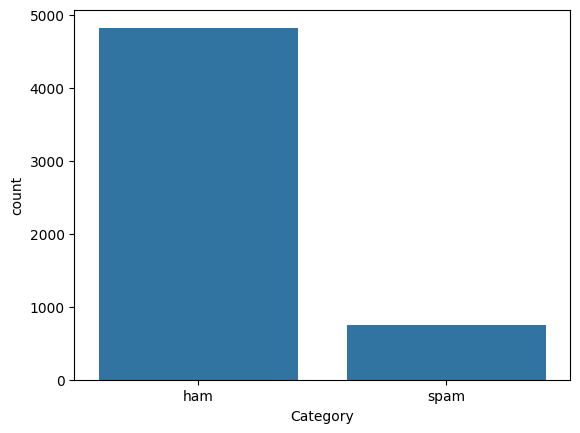

In [4]:
sns.countplot(x = df['Category'])
plt.show()

In [5]:
X = df['Message']
y = df['Category']

In [6]:
X.shape, y.shape

((5572,), (5572,))

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state =42)

In [9]:
x_train.shape, y_train.shape

((4457,), (4457,))

In [10]:
x_test.shape, y_test.shape

((1115,), (1115,))

In [11]:
max_word = 500
tkn = Tokenizer(num_words = 500)
tkn.fit_on_texts(x_train)
seq = tkn.texts_to_sequences(x_train)
seq

[[87, 2, 172, 485, 461, 121, 33, 5, 315, 30, 67, 82, 2, 2, 316, 238],
 [246, 15, 54, 8, 462, 160, 21, 25, 95, 77, 1, 61, 33, 174, 3, 53],
 [48, 58, 49, 85, 97, 99, 59, 6, 247, 99],
 [122, 428, 22, 39, 166, 23, 208, 4, 62, 59, 48, 28, 1, 5],
 [463, 3, 50, 52, 62, 35, 4, 46, 113, 49, 2, 18, 2, 82, 87, 82],
 [8, 239, 12, 2, 32, 54, 15, 11, 25, 1, 28, 109, 4],
 [317, 339, 6],
 [201, 13, 96, 38, 64, 324, 4, 445, 171, 18, 41, 9, 100, 2, 224, 3, 16],
 [383, 23, 86, 78, 202, 126, 286, 110],
 [325, 59, 28, 240],
 [122, 6, 86, 29, 5],
 [119, 384, 39, 109, 144, 75, 29, 88, 227, 241, 28],
 [47, 88],
 [36,
  3,
  86,
  5,
  105,
  174,
  10,
  53,
  25,
  1,
  28,
  49,
  2,
  5,
  242,
  1,
  194,
  14,
  2,
  32,
  5,
  145],
 [60, 23],
 [6, 17, 4, 135, 6, 91, 25, 248, 16, 2, 54, 87, 82, 114, 215, 228, 125, 186],
 [36, 3, 14, 5, 268, 340, 5, 115, 80, 8, 464, 330, 464, 75, 60],
 [16, 2, 287, 255, 78, 18, 8, 5, 401, 154, 22, 38, 75, 13, 209],
 [231,
  9,
  180,
  1,
  306,
  446,
  2,
  97,
  3,
  

In [12]:
padd_docs = pad_sequences(seq)

In [13]:
len(padd_docs[0])

162

In [14]:
model = Sequential()
model.add(Embedding(max_word, 30, input_length= 162))
model.add(LSTM(256))
model.add(Dense(1, activation = 'sigmoid'))


In [15]:
model.compile(loss='binary_crossentropy', optimizer = 'adam',metrics=[['accuracy']])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 162, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.fit(padd_docs, y_train, batch_size= 128, epochs= 10,validation_split= 0.2)

Epoch 1/10
28/28 [==============================] - 7s 147ms/step - loss: 0.4083 - accuracy: 0.8609 - val_loss: 0.2786 - val_accuracy: 0.8643
Epoch 2/10
28/28 [==============================] - 3s 122ms/step - loss: 0.1876 - accuracy: 0.9475 - val_loss: 0.1810 - val_accuracy: 0.9686
Epoch 3/10
28/28 [==============================] - 2s 81ms/step - loss: 0.0994 - accuracy: 0.9731 - val_loss: 0.0898 - val_accuracy: 0.9742
Epoch 4/10
28/28 [==============================] - 1s 33ms/step - loss: 0.0572 - accuracy: 0.9818 - val_loss: 0.0765 - val_accuracy: 0.9787
Epoch 5/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0716 - val_accuracy: 0.9798
Epoch 6/10
28/28 [==============================] - 1s 38ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0649 - val_accuracy: 0.9821
Epoch 7/10
28/28 [==============================] - 1s 27ms/step - loss: 0.0297 - accuracy: 0.9924 - val_loss: 0.0751 - val_accuracy: 0.9798
Epoch 8/10


In [22]:
test_seq = tkn.texts_to_sequences(x_test)
test_seq

[[41,
  9,
  36,
  6,
  11,
  384,
  10,
  90,
  36,
  6,
  32,
  152,
  6,
  91,
  291,
  6,
  91,
  424,
  6,
  91,
  25,
  267,
  6],
 [7, 190, 207, 136, 196, 4, 25, 23, 69, 136, 54, 15, 5, 12],
 [292,
  345,
  22,
  1,
  56,
  4,
  223,
  10,
  177,
  345,
  36,
  1,
  134,
  4,
  335,
  223,
  10,
  19,
  55],
 [17, 126, 95, 368, 187, 47],
 [25, 4, 21, 35, 5, 387, 146, 65, 25, 115, 28],
 [37, 76, 8, 5, 14, 136, 4, 394, 25, 74, 10],
 [63, 4, 146, 4, 36, 39, 234, 135, 2, 63, 59, 158, 210, 30, 123, 24, 59],
 [11, 184, 40, 10, 75, 88, 1, 269, 203, 1, 169, 99, 270, 97, 6, 1, 169, 99],
 [112, 55, 178, 22, 66, 1, 61, 42],
 [31, 8],
 [206, 11, 9, 35, 11, 9, 57, 19, 423],
 [38, 314, 5, 9, 18, 13, 31, 25, 1, 161, 293, 374, 13, 3],
 [31, 498, 136, 22, 331],
 [246, 278, 391, 49, 2, 477, 9, 77, 72, 7, 35, 196],
 [46,
  372,
  69,
  191,
  2,
  12,
  4,
  26,
  69,
  32,
  2,
  12,
  4,
  235,
  271,
  259,
  150,
  337,
  46,
  407,
  20,
  2,
  81,
  82],
 [338, 1, 61, 239, 12, 13, 16],
 [452

In [23]:
test_padd = pad_sequences(test_seq)

In [27]:
test_padd

array([[  0,   0,   0, ...,  25, 267,   6],
       [  0,   0,   0, ...,  15,   5,  12],
       [  0,   0,   0, ...,  10,  19,  55],
       ...,
       [  0,   0,   0, ...,   3,  25, 123],
       [  0,   0,   0, ...,  41, 109, 186],
       [  0,   0,   0, ...,   0, 415,  91]], dtype=int32)

In [29]:
acc= model.evaluate(test_padd, y_test)


35/35 [==============================] - 0s 6ms/step - loss: 0.1171 - accuracy: 0.9767


In [33]:
print(acc[1])

0.9766815900802612


In [35]:
model_json = model.to_json()

In [36]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 162], "dtype": "float32", "sparse": false, "ragged": false, "name": "embedding_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Embedding", "config": {"name": "embedding", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 162], "input_dim": 500, "output_dim": 30, "embeddings_initializer": {"module": "keras.initializers", "class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}, "registered_name": null}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": 162}, "registered_name": null, "build_config": {"input_shape": [null, 162]}}, {"module": "keras.layers", "class_name": "LSTM", "config": {"name": "lstm", "trainable": true, "dtype": "float32", "return_sequences": false,